In [1]:
#Libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading dataset using Pandas
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/AdultIncome.csv')

In [4]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
dataset.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
x = dataset[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'
            ]]
print(x)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  
0                  40  
1                  50  
2                  40  
3                  40  
4                  30  
...               ...  
48837              38  
488

In [9]:
dataset.loc[dataset['income'] == '<=50K', 'class'] = 0
dataset.loc[dataset['income'] == '>50K', 'class'] = 1

dataset['class'] = dataset['class'].astype(int)

In [10]:
y = dataset['class']
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
# Model 1

Model_NB = GaussianNB()
Model_NB.fit(X_train, y_train)

y_pred = Model_NB.predict(X_test)
print(accuracy_score(y_pred, y_test))


0.7999131405881623


In [13]:
print(confusion_matrix(y_pred, y_test))

[[11691  2600]
 [  625  1202]]


In [14]:
# Model KNN

model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7786325846879265


In [15]:
print(confusion_matrix(y_pred, y_test))

[[11302  2554]
 [ 1014  1248]]


In [16]:
# Model K-Means
model2 = KMeans(n_clusters=3)
model2.fit(x)

predicted = model2.predict(x)
predicted
print(accuracy_score(y, predicted))

0.40502026944023584


In [17]:
# Scaling of data here

In [18]:
print(x)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
4       18  103497               10             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  
0                  40  
1                  50  
2                  40  
3                  40  
4                  30  
...               ...  
48837              38  
488

In [19]:
print(y)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64


In [20]:
# Scaling Data

scaler = MinMaxScaler()
scaler.fit(x[['fnlwgt']])
x['fnlwgt'] = scaler.transform(x[['fnlwgt']])

scaler.fit(x[['age']])
x['age'] = scaler.transform(x[['age']])

scaler.fit(x[['educational-num']])
x['educational-num'] = scaler.transform(x[['educational-num']])

scaler.fit(x[['capital-gain']])
x['capital-gain'] = scaler.transform(x[['capital-gain']])

scaler.fit(x[['capital-loss']])
x['capital-loss'] = scaler.transform(x[['capital-loss']])

scaler.fit(x[['hours-per-week']])
x['hours-per-week'] = scaler.transform(x[['hours-per-week']])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [22]:
# Model Scaled
# Model 1

Model_NB = GaussianNB()
Model_NB.fit(X_train, y_train)

y_pred = Model_NB.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7999131405881623


In [23]:
print(confusion_matrix(y_pred, y_test))

[[11692  2601]
 [  624  1201]]


In [24]:
# Model KNN

model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8093435910162551


In [25]:
print(confusion_matrix(y_pred, y_test))

[[11210  1967]
 [ 1106  1835]]


In [26]:
# Model K-Means
model2 = KMeans(n_clusters=3)
model2.fit(x)

predicted = model2.predict(x)
predicted
print(accuracy_score(y, predicted))

0.24849514761885264


In [27]:
import scipy.cluster.hierarchy as sch                # For dendrograms
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering  # For clusters

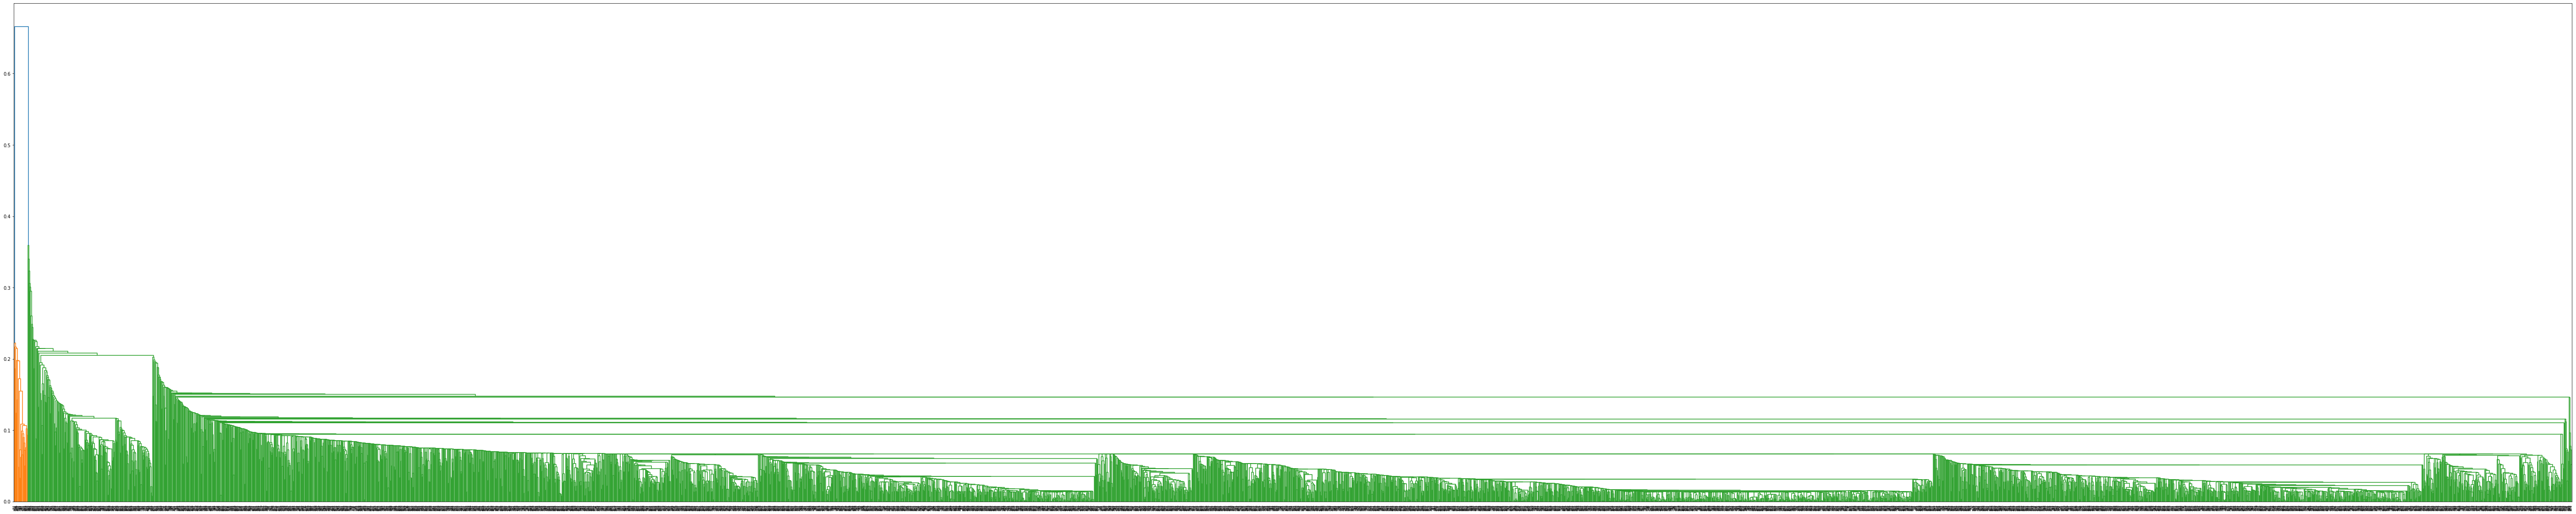

In [28]:
# Dendrogram
Z = sch.linkage(x[:5000], method='single', metric='euclidean')
plt.figure(figsize = (100, 20))
dendrogram = sch.dendrogram(Z)

In [29]:
# Forming clusters
model = AgglomerativeClustering(n_clusters=5,
    affinity='euclidean',
    linkage='single')

# Fitting int our model
model.fit(x)
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
print(accuracy_score(y, labels))

0.7656525121821384
